# I. Exploratory Analysis prior to modeling

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import os
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization
from numpy import median, mean


### Read original dataframe

In [2]:
# make sure to navigate to the local repo
os.chdir('/users/trevor.mattos/desktop/nycdsa/finalproject/cleancode')

In [3]:
# read data from file
df=pd.read_csv('./data/compiled.csv')

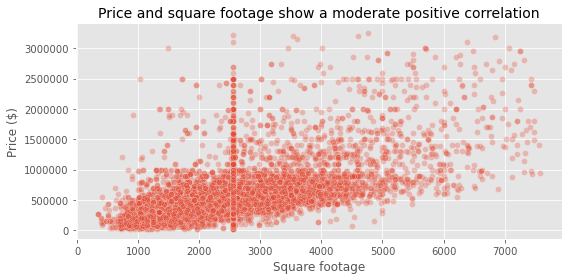

In [4]:
plt.figure(figsize = (8,4))

sns.scatterplot(data=df,x='square_footage',y='price', alpha=.3)
plt.xlabel('Square footage', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price and square footage show a moderate positive correlation', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig("./viz/graph1.png", dpi=300)


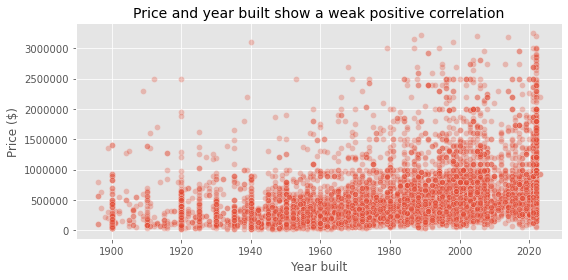

In [5]:
plt.figure(figsize = (8,4))

sns.scatterplot(data=df,x='year_built',y='price', alpha=.3)
plt.xlabel('Year built', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price and year built show a weak positive correlation', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig("./viz/graph2.png", dpi=300)

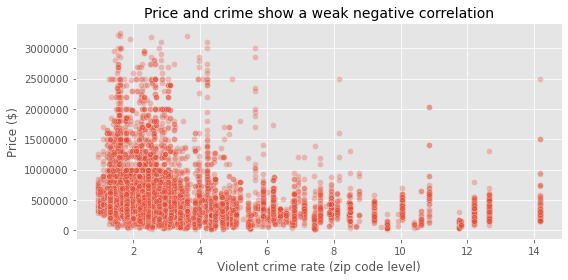

In [6]:
plt.figure(figsize = (8,4))

sns.scatterplot(data=df,x='violent_crime_total_rate',y='price', alpha=.3)
plt.xlabel('Violent crime rate (zip code level)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price and crime show a weak negative correlation', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig("./viz/graph3.png", dpi=300)

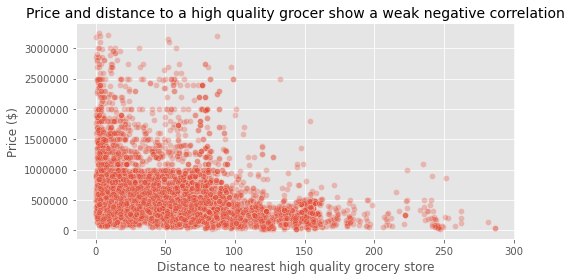

In [7]:
plt.figure(figsize = (8,4))

sns.scatterplot(data=df,x='grocer_dist',y='price', alpha=.3)
plt.xlabel('Distance to nearest high quality grocery store', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title(
    'Price and distance to a high quality grocer show a weak negative correlation',
    fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig("./viz/graph4.png", dpi=300)

# II. Exploratory Analysis after modeling completed

### Read data with cluster labels

In [8]:
# read data from file
df=pd.read_csv('./data/clustered.csv')

## Map with geopandas

In [9]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
# source for shapefiles: 
#https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
# county subdivisions for state of Georgia

In [10]:
ga_city_map = gpd.read_file('./data/cb_2018_13_cousub_500k/cb_2018_13_cousub_500k.shp')


In [11]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### Create a column with colors assigned to clusters

In [12]:
# create function
def coloring(clusters):
    if clusters==0:
        return '#3498DB'
    elif clusters==1:
        return '#17A589'
    elif clusters==2:
        return '#C39BD3'
    
# create new column
geo_df['color']=geo_df['clusters'].apply(coloring)

### Visualize clusters on state map of Georgia

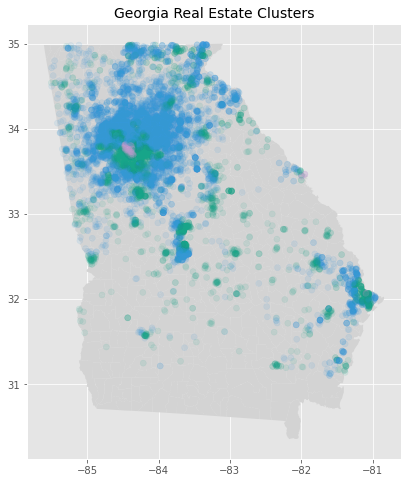

In [13]:
fig, ax = plt.subplots(figsize = (8,8))
ga_city_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, alpha=.1, color=geo_df['color'])
ax.set_title('Georgia Real Estate Clusters',
    fontsize=14)
plt.savefig("./viz/graph5.png", dpi=300)

### Create 3d visualization of clusters against longitude and latitude

In [14]:
fig = px.scatter_3d(geo_df, x=geo_df['lon'],
                    y=geo_df['lat'],
                    z=geo_df['clusters'],
                    color=geo_df['color'],
                    color_discrete_sequence=[
                 '#3498DB', '#17A589', '#C39BD3'],
                 opacity=0, height=700, width=700)

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()
fig.write_image("./viz/graph6.png")

### Apply appropriate names to clusters

In [15]:
# Create function to name clusters
def namecluster(clusters):
    if clusters==0:
        return 'Outer ring'
    elif clusters==1:
        return 'Inner ring'
    elif clusters==2:
        return 'Downtown'
    
# apply function to create a new column with names corresponding to clusters
df['namedcluster']=df['clusters'].apply(namecluster)

## Create some basic visualizations to describe clusters

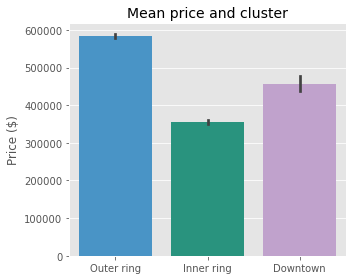

In [16]:
plt.figure(figsize = (5,4))
sns.barplot(
    x='namedcluster',
    y='price',
    data=df,
    estimator=mean,
    palette=[
                 '#3498DB', '#17A589', '#C39BD3'],
    ci=68)

plt.xlabel('', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Mean price and cluster', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig("./viz/graph7.png", dpi=300)

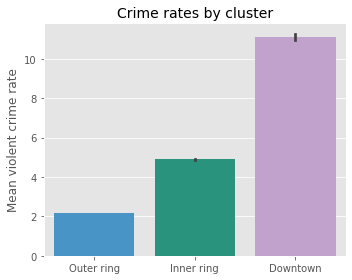

In [17]:
plt.figure(figsize = (5,4))
sns.barplot(
    x='namedcluster',
    y='violent_crime_total_rate',
    data=df,
    estimator=mean,
    palette=[
                 '#3498DB', '#17A589', '#C39BD3'],
    ci=68)



plt.xlabel('', fontsize=12)
plt.ylabel('Mean violent crime rate', fontsize=12)
plt.title('Crime rates by cluster', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig("./viz/graph8.png", dpi=300)

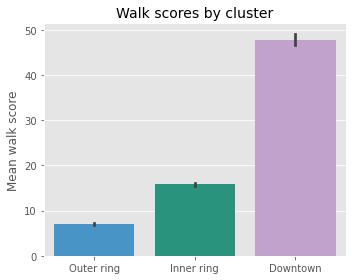

In [18]:
plt.figure(figsize = (5,4))
sns.barplot(
    x='namedcluster',
    y='walkscore',
    data=df,
    estimator=mean,
    palette=[
                 '#3498DB', '#17A589', '#C39BD3'],
    ci=68)
plt.xlabel('', fontsize=12)
plt.ylabel('Mean walk score', fontsize=12)
plt.title('Walk scores by cluster', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig("./viz/graph9.png", dpi=300)

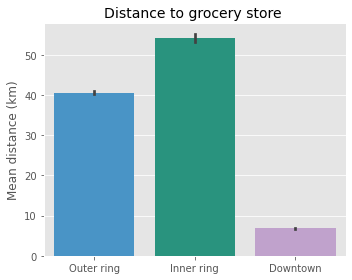

In [19]:
plt.figure(figsize = (5,4))
sns.barplot(
    x='namedcluster',
    y='grocer_dist',
    data=df,
    estimator=mean,
    palette=[
                 '#3498DB', '#17A589', '#C39BD3'],
    ci=68)

plt.xlabel('', fontsize=12)
plt.ylabel('Mean distance (km)', fontsize=12)
plt.title('Distance to grocery store ', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig("./viz/graph10.jpg", dpi=300)